In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
from matplotlib.ticker import FuncFormatter

In [3]:
sns.set_style('darkgrid')
# palette = sns.color_palette('Accent', 10)
palette = sns.color_palette('Paired', 12)
sns.set_palette(palette)

## Short batches

In [109]:
# Path to your log directory
log_dirs = ['data/q2_pg_cartpole_CartPole-v0_10-04-2025_14-51-54/',
            'data/q2_pg_cartpole_na_CartPole-v0_13-04-2025_21-58-10/',
            'data/q2_pg_cartpole_rtg_CartPole-v0_10-04-2025_15-19-44/',
            'data/q2_pg_cartpole_rtg_na_CartPole-v0_13-04-2025_23-34-18/']
n_logs = len(log_dirs)

# Load the events file
dfs = []
for log_dir in log_dirs:
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('Eval_AverageReturn', 'Train_AverageReturn', 'Train_EnvstepsSoFar'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
    split = log_dir.split('_')
    name = split[2]
    i = 3
    while split[i] != 'CartPole-v0':
        name += '_' + split[i]
        i += 1

    df['name'] = name
    dfs.append(df)


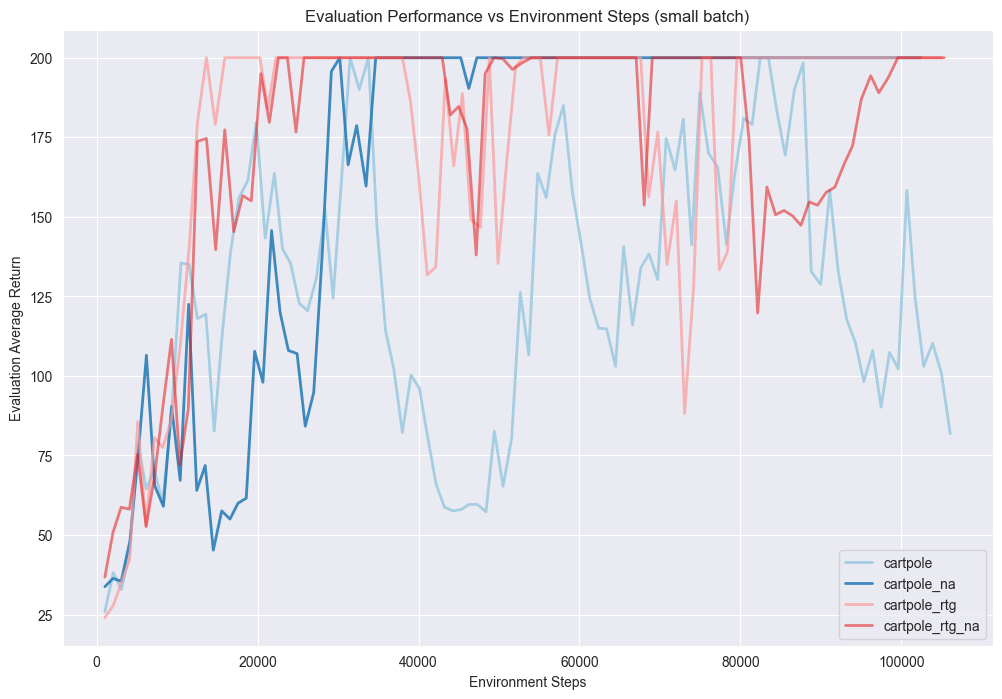

In [113]:
alphas = [1, 0.85, 0.7, 0.55]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    if c_idx == 2:
        c_idx += 2
    # ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
    #         linewidth=2, color=palette[i*2])
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[c_idx])
    c_idx += 1
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (small batch)')
ax.legend()

plt.savefig('plots/cartpole_small_batches.png', dpi=200, pad_inches=0)

## Long batches

In [114]:
# Path to your log directory
log_dirs = ['data/q2_pg_cartpole_lb_CartPole-v0_13-04-2025_23-34-41/',
            'data/q2_pg_cartpole_lb_na_CartPole-v0_13-04-2025_23-35-56/',
            'data/q2_pg_cartpole_lb_rtg_CartPole-v0_13-04-2025_23-35-22/',
            'data/q2_pg_cartpole_lb_rtg_na_CartPole-v0_13-04-2025_23-37-21/']
n_logs = len(log_dirs)

# Load the events file
dfs = []
for log_dir in log_dirs:
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('Eval_AverageReturn', 'Train_AverageReturn', 'Train_EnvstepsSoFar'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
    split = log_dir.split('_')
    name = split[2]
    i = 3
    while split[i] != 'CartPole-v0':
        name += '_' + split[i]
        i += 1

    df['name'] = name
    dfs.append(df)


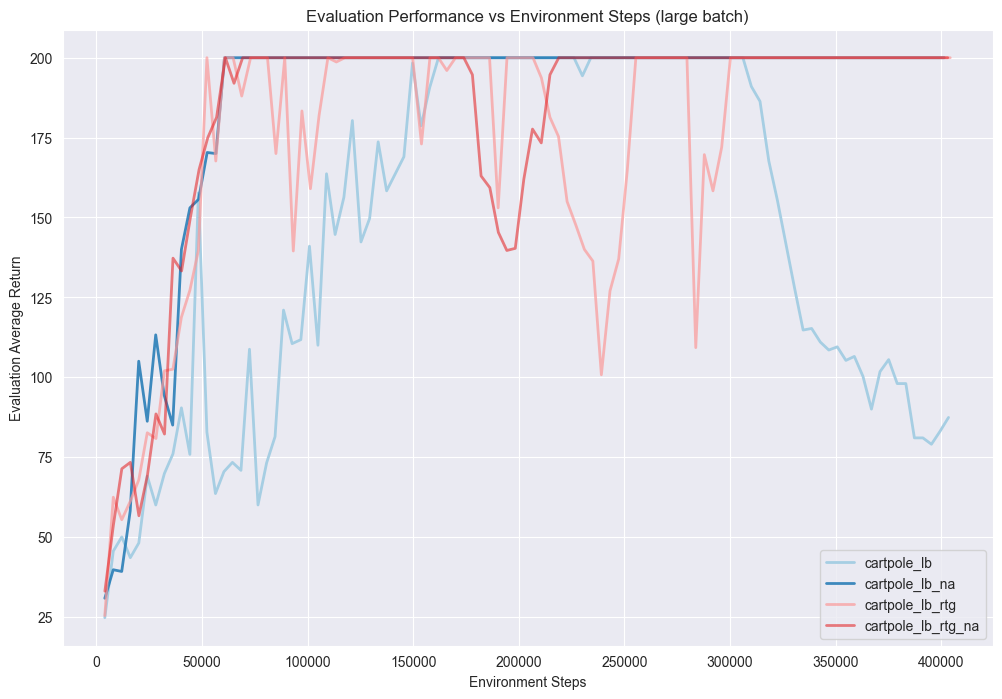

In [115]:
alphas = [1, 0.85, 0.7, 0.55]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
c_idx = 0
for i, df in enumerate(dfs):
    if c_idx == 2:
        c_idx += 2
    # ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
    #         linewidth=2, color=palette[i*2])
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[c_idx])
    c_idx += 1
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (large batch)')
ax.legend()

plt.savefig('plots/cartpole_large_batches.png', dpi=200, pad_inches=0)

## Neural Network Baseline

In [119]:
# Path to your log directory
log_dirs = ['data/q2_pg_cheetah_HalfCheetah-v4_14-04-2025_16-08-22/',
            'data/q2_pg_cheetah_baseline_HalfCheetah-v4_14-04-2025_16-09-36/',
            'data/q2_pg_cheetah_baseline_na_HalfCheetah-v4_14-04-2025_17-02-13/',
            'data/q2_pg_cheetah_baseline_reduced_bgs_blr_HalfCheetah-v4_14-04-2025_22-49-12/']
n_logs = len(log_dirs)

# Load the events file
dfs = []
for log_dir in log_dirs:
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('Eval_AverageReturn', 'Baseline_Loss', 'Train_EnvstepsSoFar'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
    split = log_dir.split('_')
    name = split[2]
    i = 3
    while split[i] != 'HalfCheetah-v4':
        name += '_' + split[i]
        i += 1

    df['name'] = name
    dfs.append(df)


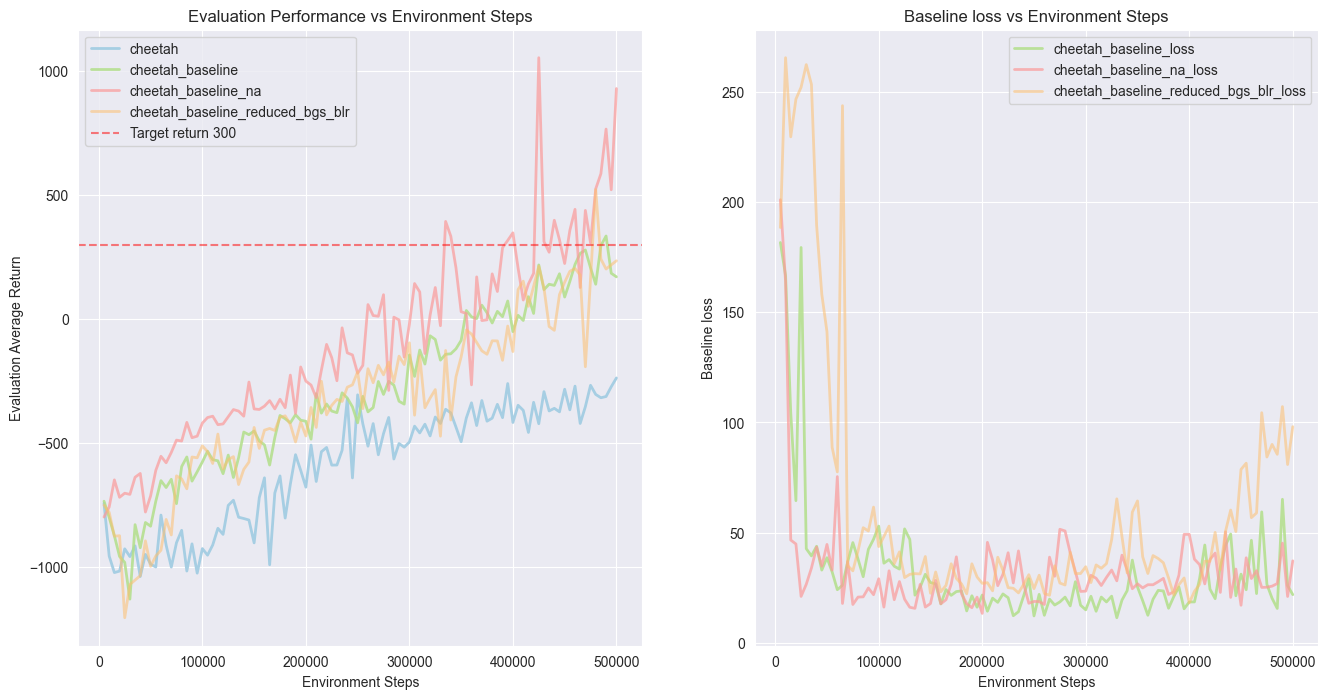

In [124]:
alphas = [1, 0.85, 0.7, 0.55]
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

for idx, df in enumerate(dfs):
    axs[0].plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[idx], label=df['name'][0],
                color=palette[2*idx], linewidth=2)
    if 'Baseline_Loss' in df.columns:
        axs[1].plot(df['Train_EnvstepsSoFar'], df['Baseline_Loss'], alpha=alphas[idx], label=df['name'][0] + '_loss',
                    color=palette[2*idx], linewidth=2)

axs[0].axhline(y=300, color='r', linestyle='--', alpha=0.5, label='Target return 300')
axs[0].set_xlabel('Environment Steps')
axs[0].set_ylabel('Evaluation Average Return')
axs[0].set_title('Evaluation Performance vs Environment Steps')
axs[0].legend()

axs[1].set_xlabel('Environment Steps')
axs[1].set_ylabel('Baseline loss')
axs[1].set_title('Baseline loss vs Environment Steps')
axs[1].legend()

plt.savefig('plots/nn_baseline.png', dpi=400, pad_inches=0)

## GAE

In [170]:
# Path to your log directory
log_dirs = ['data/q2_pg_lunar_lander_lambda_0_LunarLander-v3_15-04-2025_14-33-07/',
            'data/q2_pg_lunar_lander_lambda_95_LunarLander-v3_15-04-2025_14-34-46/',
            'data/q2_pg_lunar_lander_lambda_98_LunarLander-v3_15-04-2025_14-36-41/',
            'data/q2_pg_lunar_lander_lambda_99_LunarLander-v3_15-04-2025_14-38-39/',
            'data/q2_pg_lunar_lander_lambda_1_LunarLander-v3_15-04-2025_14-41-29/']
n_logs = len(log_dirs)

# Load the events file
dfs = []
for log_dir in log_dirs:
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('Eval_AverageReturn', 'Train_EnvstepsSoFar'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
    df['rolling_eval'] = df['Eval_AverageReturn'].rolling(8).mean()
    split = log_dir.split('_')
    name = split[2]
    i = 3
    while split[i] != 'LunarLander-v3':
        name += '_' + split[i]
        i += 1

    df['name'] = name
    dfs.append(df)


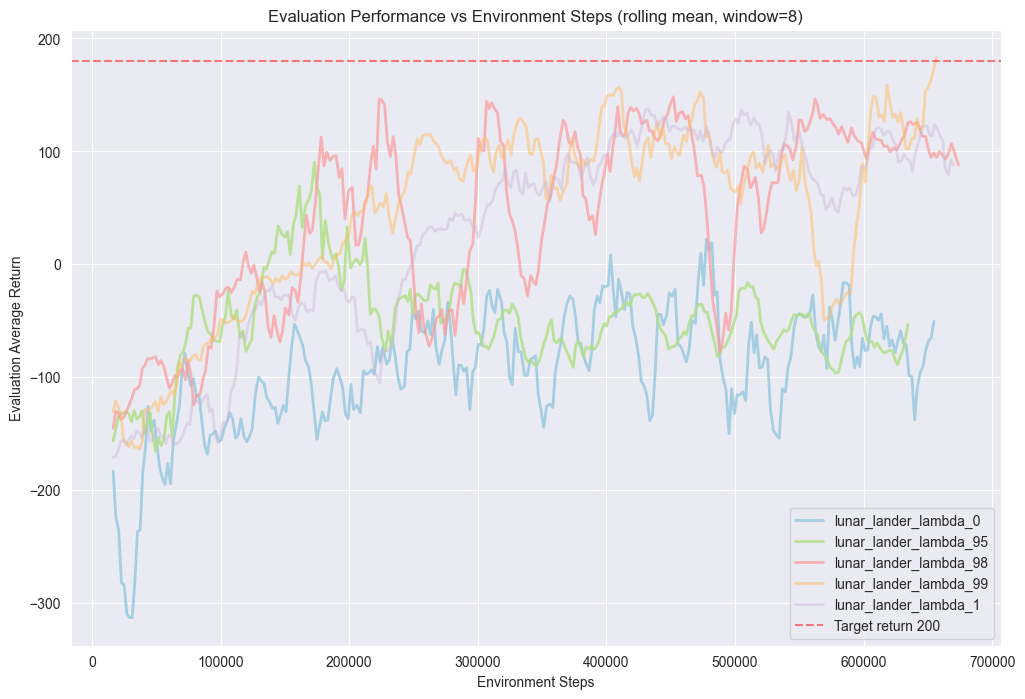

In [189]:
alphas = [1, 0.85, 0.7, 0.55, 0.4]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['rolling_eval'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.axhline(y=180, color='r', linestyle='--', alpha=0.5, label='Target return 200')
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (rolling mean, window=8)')
ax.legend()

plt.savefig('plots/lunar_lander_roll.png', dpi=200, pad_inches=0)

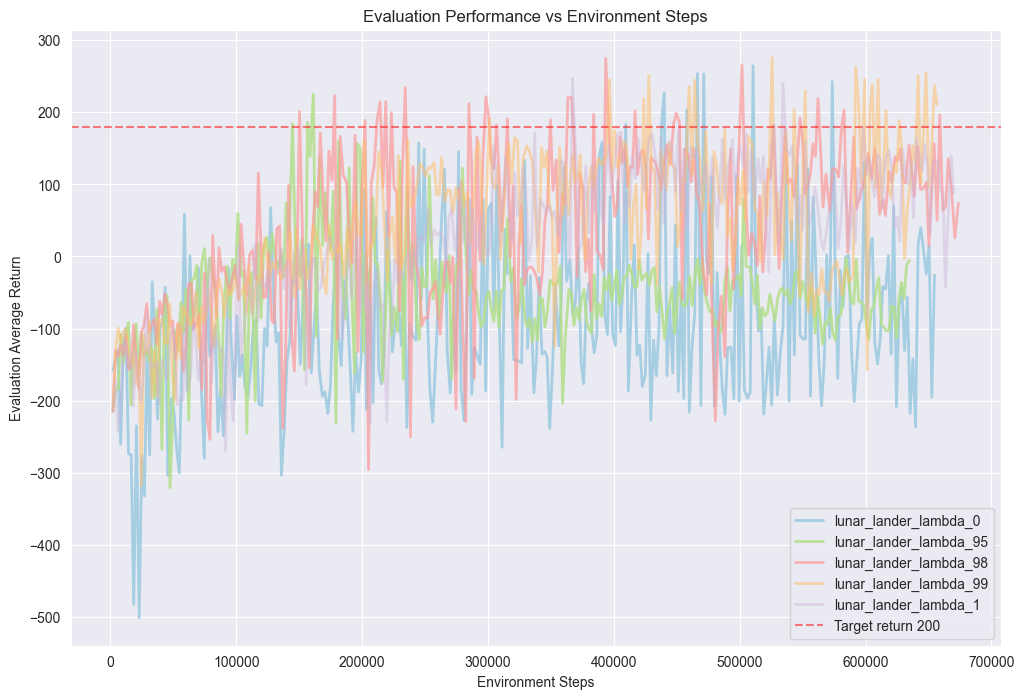

In [188]:
alphas = [1, 0.85, 0.7, 0.55, 0.4]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.axhline(y=180, color='r', linestyle='--', alpha=0.5, label='Target return 200')
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps')
ax.legend()

plt.savefig('plots/lunar_lander.png', dpi=200, pad_inches=0)

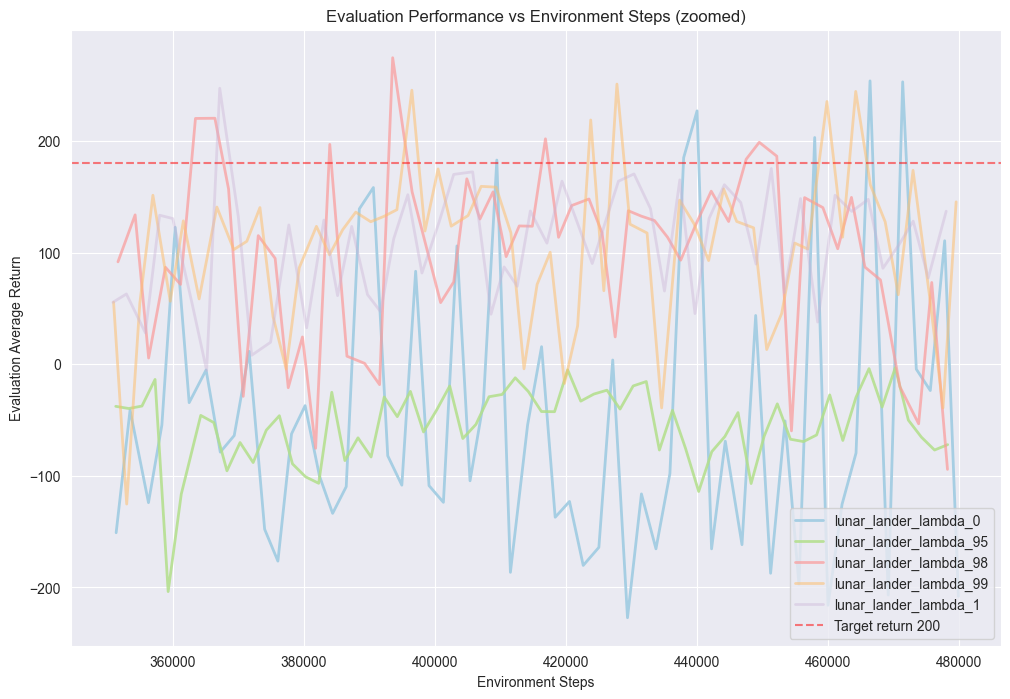

In [187]:
alphas = [1, 0.85, 0.7, 0.55, 0.4]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    df_ = df[(df['Train_EnvstepsSoFar'] > 350000) & (df['Train_EnvstepsSoFar'] < 480000)]
    ax.plot(df_['Train_EnvstepsSoFar'], df_['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.axhline(y=180, color='r', linestyle='--', alpha=0.5, label='Target return 200')
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (zoomed)')
ax.legend()

plt.savefig('plots/lunar_lander_zoomed.png', dpi=200, pad_inches=0)

## Parameter finetuning

In [228]:
#TODO: fix episodes can have different number of time steps -> cannot just use group by timesteps

def get_parameter_finetuning_data(log_dirs):
    n_logs = len(log_dirs)
    # Load the events file
    dfs = []
    for log_dir in log_dirs:
        ea = event_accumulator.EventAccumulator(log_dir)
        ea.Reload()  # Load all data

        # Access scalar data
        df = pd.DataFrame()
        for scalar_tag in ea.Tags()['scalars']:
            if scalar_tag not in ('Eval_AverageReturn', 'Train_EnvstepsSoFar'):
                continue
            scalar_events = ea.Scalars(scalar_tag)
            arr = []
            for event in scalar_events:
                arr.append(event.value)
            df[scalar_tag] = arr
        
        split = log_dir.split('_')
        name = split[2]
        i = 3
        while split[i] != 'InvertedPendulum-v4':
            name += '_' + split[i]
            i += 1

        df['name'] = name
        dfs.append(df)

    # Define a common x-axis grid for all runs
    min_steps = min([df['Train_EnvstepsSoFar'].min() for df in dfs])
    max_steps = max([df['Train_EnvstepsSoFar'].max() for df in dfs])
    common_steps = np.linspace(min_steps, max_steps, 100)  # 100 points evenly spread

    # Interpolate each run to this common grid
    interpolated_returns = []
    for df in dfs:
        # Create interpolation function
        # f = interp1d(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], 
        #             kind='linear', fill_value='extrapolate')
        interpolated_returns.append(np.interp(common_steps, df['Train_EnvstepsSoFar'], df['Eval_AverageReturn']))
        
        # Apply to common grid
        # interpolated_returns.append(f(common_steps))

    # Calculate statistics across runs
    mean_returns = np.mean(interpolated_returns, axis=0)
    std_returns = np.std(interpolated_returns, axis=0)

    # Create result dataframe
    result_df = pd.DataFrame({
        'Train_EnvstepsSoFar': common_steps,
        'Eval_AverageReturn_mean': mean_returns,
        'Eval_AverageReturn_std': std_returns
    })

    return dfs, result_df

Maximum reached at: 446,813.8


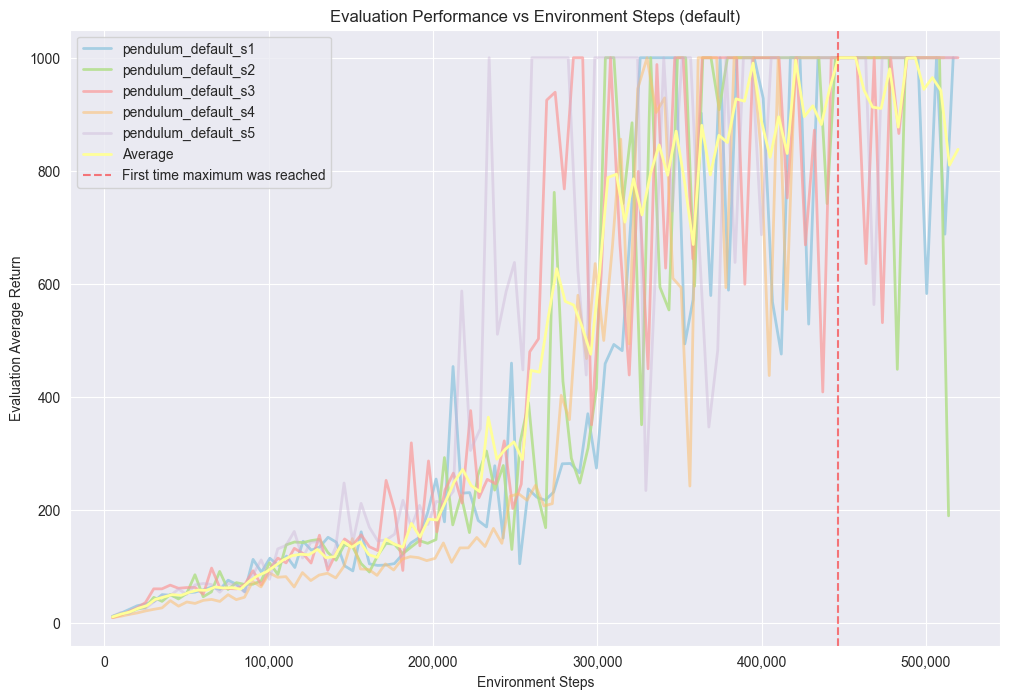

In [268]:
log_dirs = ['data/q2_pg_pendulum_default_s1_InvertedPendulum-v4_15-04-2025_23-40-40/',
            'data/q2_pg_pendulum_default_s2_InvertedPendulum-v4_15-04-2025_23-41-22/',
            'data/q2_pg_pendulum_default_s3_InvertedPendulum-v4_15-04-2025_23-42-05/',
            'data/q2_pg_pendulum_default_s4_InvertedPendulum-v4_15-04-2025_23-42-50/',
            'data/q2_pg_pendulum_default_s5_InvertedPendulum-v4_15-04-2025_23-43-31/']

dfs, result_df = get_parameter_finetuning_data(log_dirs)

alphas = [1, 0.85, 0.7, 0.55, 0.4]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.plot(result_df['Train_EnvstepsSoFar'], result_df['Eval_AverageReturn_mean'], alpha=1, label='Average',
        linewidth=2, color=palette[len(dfs)*2])

first_max = result_df.iloc[result_df['Eval_AverageReturn_mean'].idxmax()]['Train_EnvstepsSoFar']
ax.axvline(x=first_max, color='r', linestyle='--', alpha=0.5, label='First time maximum was reached')

ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (default)')
ax.legend()

plt.savefig('plots/sample_efficiency_default.png', dpi=200, pad_inches=0)

print(f'Maximum reached at: {first_max:,.1f}')

Maximum reached at: 142,731.1


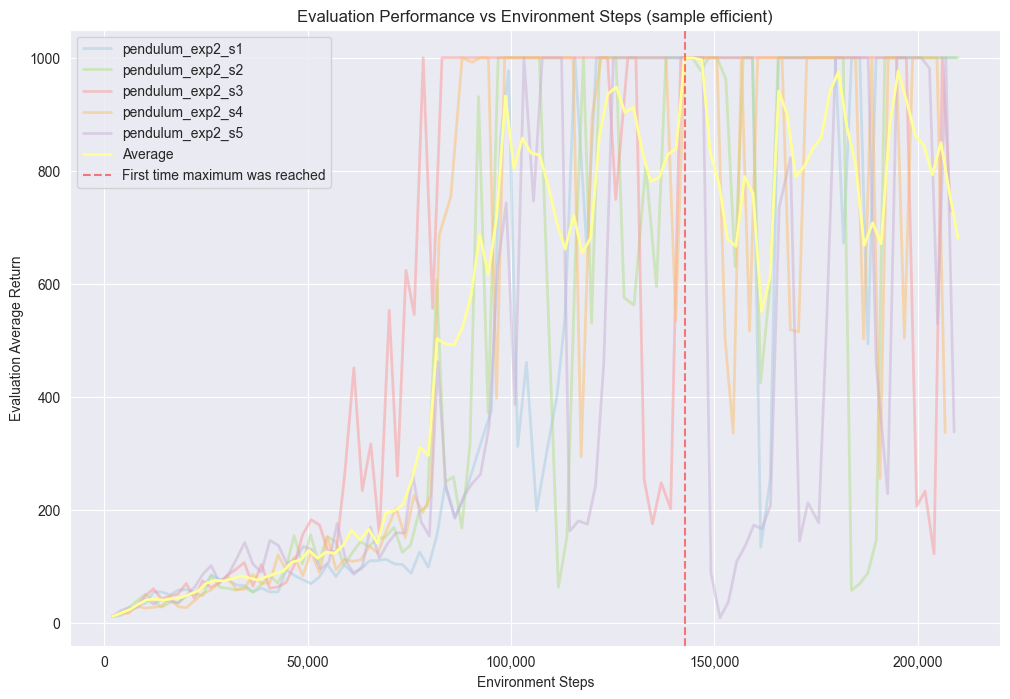

In [267]:
"""
for seed in $(seq 1 5); do
PYTHONPATH=$PYTHONPATH:$(pwd) python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
--exp_name pendulum_exp2_s$seed \
-rtg --use_baseline -na \
--batch_size 2000 \
--discount 0.99 \
--n_layers 3 \
--seed $seed
done
"""
log_dirs = ['data/q2_pg_pendulum_exp2_s1_InvertedPendulum-v4_16-04-2025_14-56-23/',
            'data/q2_pg_pendulum_exp2_s2_InvertedPendulum-v4_16-04-2025_14-56-46/',
            'data/q2_pg_pendulum_exp2_s3_InvertedPendulum-v4_16-04-2025_14-57-10/',
            'data/q2_pg_pendulum_exp2_s4_InvertedPendulum-v4_16-04-2025_14-57-36/',
            'data/q2_pg_pendulum_exp2_s5_InvertedPendulum-v4_16-04-2025_14-58-01/']

dfs, result_df = get_parameter_finetuning_data(log_dirs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=0.5, label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.plot(result_df['Train_EnvstepsSoFar'], result_df['Eval_AverageReturn_mean'], alpha=1, label='Average',
        linewidth=2, color=palette[len(dfs)*2])

first_max = result_df.iloc[result_df['Eval_AverageReturn_mean'].idxmax()]['Train_EnvstepsSoFar']
ax.axvline(x=first_max, color='r', linestyle='--', alpha=0.5, label='First time maximum was reached')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (sample efficient)')
ax.legend()

print(f'Maximum reached at: {first_max:,.1f}')

Maximum reached at: 111,861.7


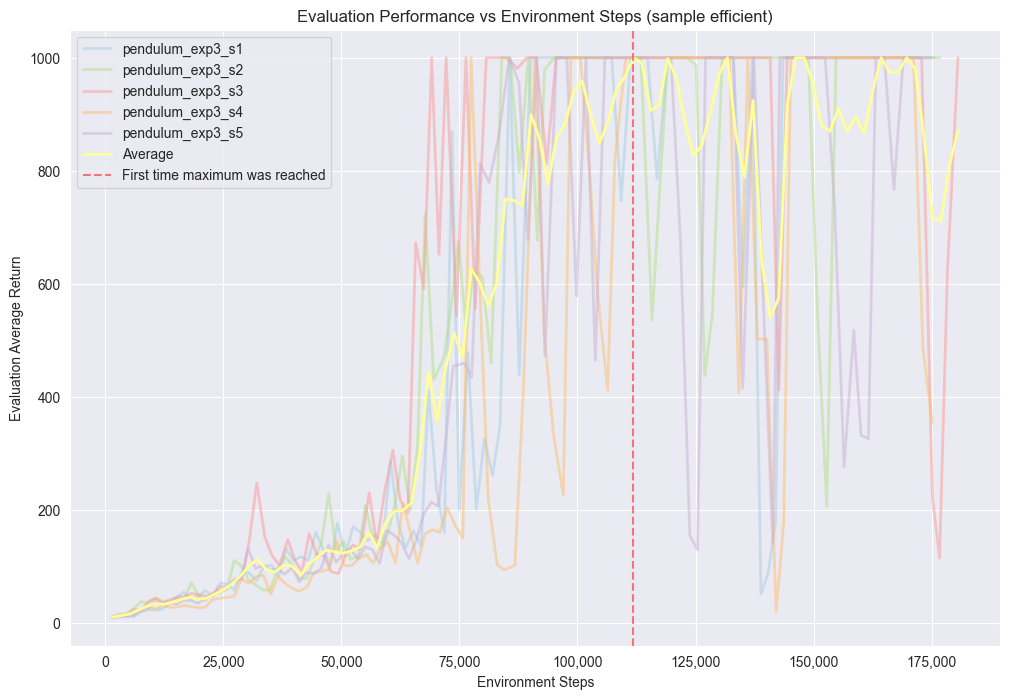

In [ ]:
"""
for seed in $(seq 1 5); do
PYTHONPATH=$PYTHONPATH:$(pwd) python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
--exp_name pendulum_exp3_s$seed \
-rtg --use_baseline -na \
--batch_size 1500 \
--discount 0.98 \
--n_layers 3 \
--layer_size 42 \
--seed $seed
done
"""

log_dirs = ['data/q2_pg_pendulum_exp3_s1_InvertedPendulum-v4_16-04-2025_17-04-15/',
            'data/q2_pg_pendulum_exp3_s2_InvertedPendulum-v4_16-04-2025_17-04-35/',
            'data/q2_pg_pendulum_exp3_s3_InvertedPendulum-v4_16-04-2025_17-04-56/',
            'data/q2_pg_pendulum_exp3_s4_InvertedPendulum-v4_16-04-2025_17-05-18/',
            'data/q2_pg_pendulum_exp3_s5_InvertedPendulum-v4_16-04-2025_17-05-39/']

dfs, result_df = get_parameter_finetuning_data(log_dirs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=0.5, label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.plot(result_df['Train_EnvstepsSoFar'], result_df['Eval_AverageReturn_mean'], alpha=1, label='Average',
        linewidth=2, color=palette[len(dfs)*2])

first_max = result_df.iloc[result_df['Eval_AverageReturn_mean'].idxmax()]['Train_EnvstepsSoFar']
ax.axvline(x=first_max, color='r', linestyle='--', alpha=0.5, label='First time maximum was reached')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (sample efficient)')
ax.legend()

plt.savefig('plots/sample_efficiency_better.png', dpi=200, pad_inches=0)

print(f'Maximum reached at: {first_max:,.1f}')

Maximum reached at: 90,884.4


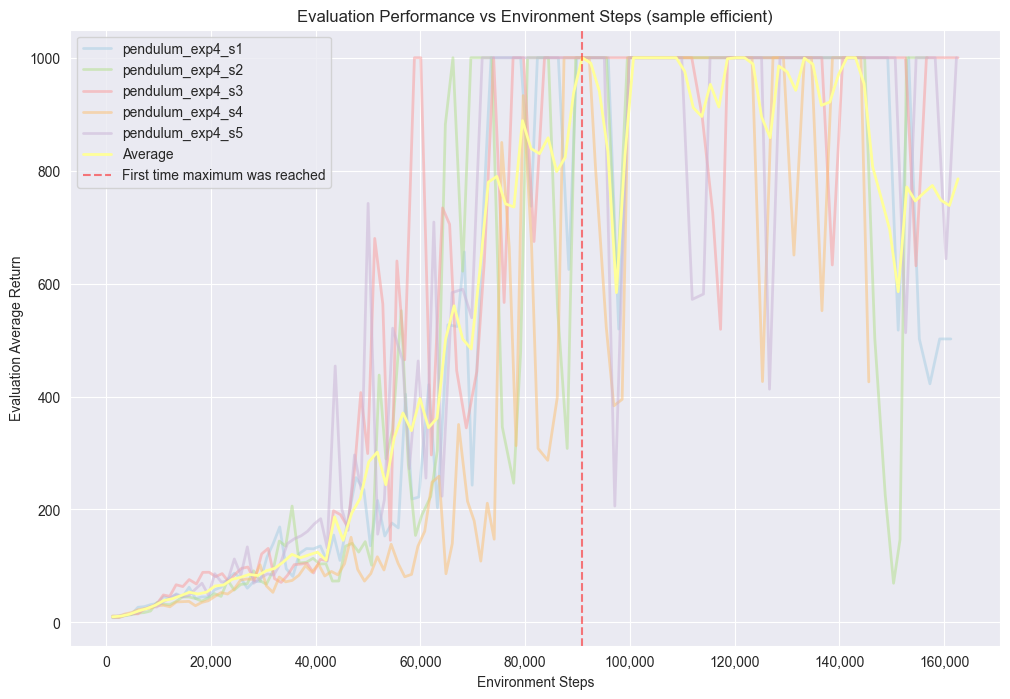

In [271]:
"""
for seed in $(seq 1 5); do
PYTHONPATH=$PYTHONPATH:$(pwd) python cs285/scripts/run_hw2.py --env_name InvertedPendulum-v4 -n 100 \
--exp_name pendulum_exp4_s$seed \
-rtg --use_baseline -na \
--batch_size 1200 \
--discount 0.98 \
--n_layers 3 \
--layer_size 36 \
--gae_lambda 0.98 \
--seed $seed
done
"""

log_dirs = ['data/q2_pg_pendulum_exp4_s1_InvertedPendulum-v4_16-04-2025_17-40-18/',
            'data/q2_pg_pendulum_exp4_s2_InvertedPendulum-v4_16-04-2025_17-40-38/',
            'data/q2_pg_pendulum_exp4_s3_InvertedPendulum-v4_16-04-2025_17-40-57/',
            'data/q2_pg_pendulum_exp4_s4_InvertedPendulum-v4_16-04-2025_17-41-19/',
            'data/q2_pg_pendulum_exp4_s5_InvertedPendulum-v4_16-04-2025_17-41-37/']

dfs, result_df = get_parameter_finetuning_data(log_dirs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=0.5, label=df['name'][0],
            linewidth=2, color=palette[i*2])
ax.plot(result_df['Train_EnvstepsSoFar'], result_df['Eval_AverageReturn_mean'], alpha=1, label='Average',
        linewidth=2, color=palette[len(dfs)*2])

first_max = result_df.iloc[result_df['Eval_AverageReturn_mean'].idxmax()]['Train_EnvstepsSoFar']
ax.axvline(x=first_max, color='r', linestyle='--', alpha=0.5, label='First time maximum was reached')
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps (sample efficient)')
ax.legend()

plt.savefig('plots/sample_efficiency_better.png', dpi=200, pad_inches=0)

print(f'Maximum reached at: {first_max:,.1f}')

## Humanoid

In [4]:
# Path to your log directory
log_dirs = ['data/q2_pg_humanoid_Humanoid-v4_17-04-2025_21-05-53/']
n_logs = len(log_dirs)

# Load the events file
dfs = []
for log_dir in log_dirs:
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()  # Load all data

    # Access scalar data
    df = pd.DataFrame()
    for scalar_tag in ea.Tags()['scalars']:
        if scalar_tag not in ('Eval_AverageReturn', 'Train_EnvstepsSoFar'):
            continue
        scalar_events = ea.Scalars(scalar_tag)
        arr = []
        for event in scalar_events:
            arr.append(event.value)
        df[scalar_tag] = arr
    df['rolling_eval'] = df['Eval_AverageReturn'].rolling(8).mean()
    split = log_dir.split('_')
    name = split[2]
    i = 3
    while split[i] != 'Humanoid-v4':
        name += '_' + split[i]
        i += 1

    df['name'] = name
    dfs.append(df)


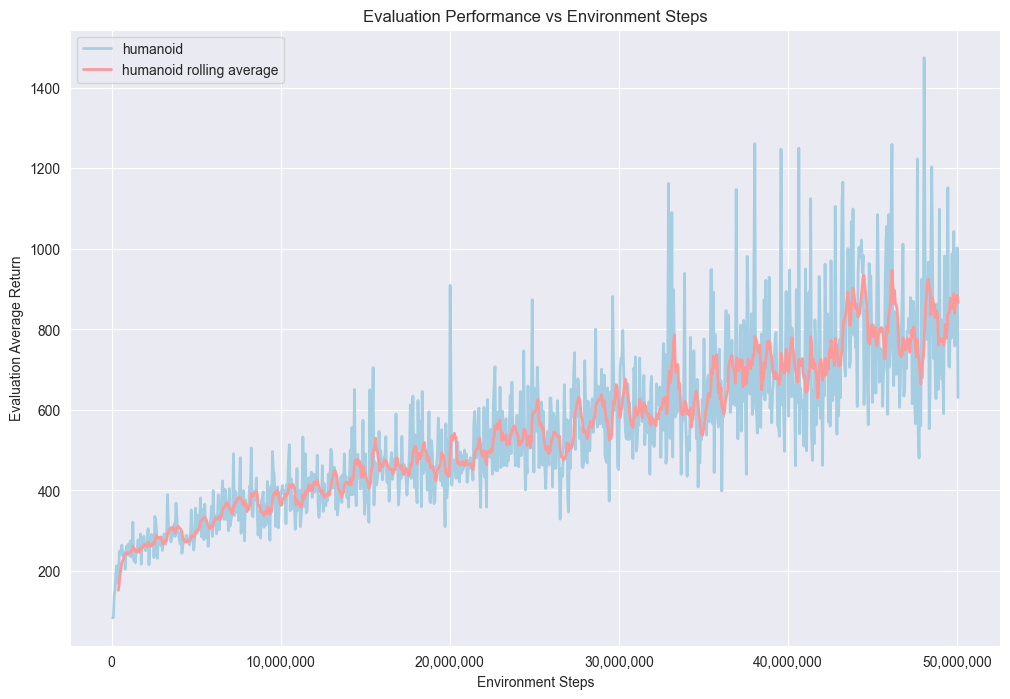

In [12]:
alphas = [1, 0.85, 0.7, 0.55, 0.4]
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for i, df in enumerate(dfs):
    ax.plot(df['Train_EnvstepsSoFar'], df['Eval_AverageReturn'], alpha=alphas[i], label=df['name'][0],
            linewidth=2, color=palette[i*2])
    ax.plot(df['Train_EnvstepsSoFar'], df['rolling_eval'], alpha=alphas[i], label=df['name'][0] + ' rolling average',
            linewidth=2, color=palette[i+4])
    
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Environment Steps')
ax.set_ylabel('Evaluation Average Return')
ax.set_title('Evaluation Performance vs Environment Steps')
ax.legend()

plt.savefig('plots/humanoid.png', dpi=200, pad_inches=0)